In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

from allen_v1dd.client import OPhysClient, EMClient
from allen_v1dd.stimulus_analysis import DriftingGratings
import allen_v1dd.stimulus_analysis.analysis_tools as at
at.set_stylesheet()

%load_ext autoreload
%autoreload 2

In [2]:
client = OPhysClient("/Users/chase/Desktop/test_v1dd_data")

In [3]:
session = client.load_ophys_session(mouse=409828, column=1, volume=3)

In [2]:
em_client = EMClient()

/opt/anaconda3/envs/allen_v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:24: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


In [4]:
em_client.get_tables()

['functional_coregistration_v1',
 'manual_pilot_functional_coregistration_v1',
 'correspondance_pilot',
 'ariadne_multisoma_proofreading_v1',
 'ariadne_dendrite_proofreading_v2',
 'ariadne_axon_proofreading_v1',
 'synapses_v1dd',
 'multisoma_split_task',
 'ariadne_dendrite_task',
 'ophys_examples',
 'manual_central_types',
 'nucleus_detection_v0',
 'ariadne_axon_task']

In [9]:
em_client.query_table("manual_pilot_functional_coregistration_v1")

,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,id,created,valid,target_id,session,scan_idx,unit_id,field,residual,score,pt_position,bb_start_position,bb_end_position
0,277703,2022-02-04 06:24:15.742387+00:00,t,279.238104,92055099945612303,864691132710145793,1,2023-02-14 16:50:14.491563+00:00,t,277703,1,3,14,2,NaN,NaN,"[794469, 608850, 265500]","[789813, 605047, 28149]","[799901, 612885, 29027]"
1,277515,2022-02-04 06:26:06.653170+00:00,t,329.847534,93180175218565442,864691132760377194,2,2023-02-14 16:50:14.492369+00:00,t,277515,1,3,60,0,NaN,NaN,"[834898, 578974, 258390]","[829699, 575016, 27320]","[840253, 582931, 28368]"
2,277213,2022-02-04 06:30:33.362739+00:00,t,313.577943,91843581329183083,864691132720617684,3,2023-02-14 16:50:14.493215+00:00,t,277213,1,3,30,1,NaN,NaN,"[786864, 593718, 243945]","[782441, 588906, 25792]","[791287, 598451, 26699]"
3,293528,2022-02-04 06:22:30.509490+00:00,t,332.374686,91070624654826905,864691132741334425,4,2023-02-14 16:50:14.494034+00:00,t,293528,1,3,119,4,NaN,NaN,"[759859, 632673, 243810]","[755436, 627939, 25734]","[764515, 637174, 26753]"
4,277969,2022-02-04 06:21:54.350553+00:00,t,313.560871,92547337557612090,864691132771662867,5,2023-02-14 16:50:14.494820+00:00,t,277969,1,3,271,1,NaN,NaN,"[812705, 597132, 270405]","[808514, 592554, 28683]","[817050, 601866, 29619]"
5,279217,2022-02-04 06:30:59.886627+00:00,t,335.971664,93109944114764879,864691132807412738,6,2023-02-14 16:50:14.495623+00:00,t,279217,1,3,269,2,NaN,NaN,"[832881, 583630, 331245]","[828380, 579905, 35129]","[837614, 587432, 36215]"
6,351982,2022-02-04 06:29:59.469281+00:00,t,267.443192,95573468367740795,864691132573738810,7,2023-02-14 16:50:14.496410+00:00,t,351982,1,3,262,1,NaN,NaN,"[918396, 607142, 236025]","[914283, 603185, 24929]","[922586, 610867, 25943]"
7,353321,2022-02-04 06:29:16.854839+00:00,t,324.422531,95221212531363026,864691132594653239,8,2023-02-14 16:50:14.497189+00:00,t,353321,1,3,158,2,NaN,NaN,"[905747, 592166, 306540]","[901014, 588130, 32514]","[909860, 596278, 33499]"
8,352900,2022-02-04 06:26:56.531405+00:00,t,312.839525,94658537388809340,864691133065754585,9,2023-02-14 16:50:14.497977+00:00,t,352900,1,3,230,2,NaN,NaN,"[888132, 601788, 287100]","[883476, 597365, 30439]","[892788, 606056, 31428]"
9,352900,2022-02-04 06:26:56.531405+00:00,t,312.839525,94658537388809340,864691133065754585,10,2023-02-14 16:50:14.498774+00:00,t,352900,1,3,278,0,NaN,NaN,"[888132, 601788, 287100]","[883476, 597365, 30439]","[892788, 606056, 31428]"


In [10]:
coreg_table = em_client.get_coregistration_table()
coreg_table

,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,id,created,valid,target_id,...,bb_end_position,ophys_session_id,ophys_plane,ophys_roi,roi,position_microns,axon_proof_status,axon_proof_complete,dendrite_proof_status,dendrite_proof_complete
0,277703,2022-02-04 06:24:15.742387+00:00,t,279.238104,92055099945612303,864691132710145793,1,2023-02-14 16:50:14.491563+00:00,t,277703,...,"[799901, 612885, 29027]",M409828_13,3,14,M409828_13_3_14,"[797.7329658575621, 268.4703958902916, 92.8290...",submitted,True,not_started,True
1,277515,2022-02-04 06:26:06.653170+00:00,t,329.847534,93180175218565442,864691132760377194,2,2023-02-14 16:50:14.492369+00:00,t,277515,...,"[840253, 582931, 28368]",M409828_13,1,60,M409828_13_1_60,"[838.0087061146714, 237.58057806602417, 93.975...",submitted,True,not_started,True
2,277213,2022-02-04 06:30:33.362739+00:00,t,313.577943,91843581329183083,864691132720617684,3,2023-02-14 16:50:14.493215+00:00,t,277213,...,"[791287, 598451, 26699]",M409828_13,2,30,M409828_13_2_30,"[790.0267659909371, 248.15872319569212, 76.111...",submitted,True,not_started,True
3,293528,2022-02-04 06:22:30.509490+00:00,t,332.374686,91070624654826905,864691132741334425,4,2023-02-14 16:50:14.494034+00:00,t,293528,...,"[764515, 637174, 26753]",M409828_13,5,119,M409828_13_5_119,"[763.2087486129211, 285.7899063229709, 65.5534...",submitted,True,submitted,True
4,277969,2022-02-04 06:21:54.350553+00:00,t,313.560871,92547337557612090,864691132771662867,5,2023-02-14 16:50:14.494820+00:00,t,277969,...,"[817050, 601866, 29619]",M409828_13,2,271,M409828_13_2_271,"[815.9190761795869, 258.40239635218177, 100.69...",submitted,True,not_started,True
5,279217,2022-02-04 06:30:59.886627+00:00,t,335.971664,93109944114764879,864691132807412738,6,2023-02-14 16:50:14.495623+00:00,t,279217,...,"[837614, 587432, 36215]",M409828_13,3,269,M409828_13_3_269,"[836.1111373665473, 261.5788020928476, 162.925...",submitted,True,not_started,True
6,351982,2022-02-04 06:29:59.469281+00:00,t,267.443192,95573468367740795,864691132573738810,7,2023-02-14 16:50:14.496410+00:00,t,351982,...,"[922586, 610867, 25943]",M409828_13,2,262,M409828_13_2_262,"[921.6109648662764, 258.31788149817294, 64.886...",submitted,True,not_started,True
7,353321,2022-02-04 06:29:16.854839+00:00,t,324.422531,95221212531363026,864691132594653239,8,2023-02-14 16:50:14.497189+00:00,t,353321,...,"[909860, 596278, 33499]",M409828_13,3,158,M409828_13_3_158,"[908.9842549292383, 262.8273367395928, 136.837...",submitted,True,not_started,True
8,352900,2022-02-04 06:26:56.531405+00:00,t,312.839525,94658537388809340,864691133065754585,9,2023-02-14 16:50:14.497977+00:00,t,352900,...,"[892788, 606056, 31428]",M409828_13,3,230,M409828_13_3_230,"[891.3897172555912, 266.98196745704587, 115.53...",submitted,True,not_started,True
9,352900,2022-02-04 06:26:56.531405+00:00,t,312.839525,94658537388809340,864691133065754585,10,2023-02-14 16:50:14.498774+00:00,t,352900,...,"[892788, 606056, 31428]",M409828_13,1,278,M409828_13_1_278,"[891.3897172555912, 266.98196745704587, 115.53...",submitted,True,not_started,True


# Load metrics

In [140]:
metrics = at.load_roi_metrics(remove_duplicates=False)
metrics.head()

,mouse,column,volume,plane,roi,is_valid,is_ignored_duplicate,has_duplicate,n_duplicates,duplicate_rois,...,spontaneous_event_mean,spontaneous_event_std,depth_chunk,depth_trunc,vol_plane,dgw_is_responsive,dgf_is_responsive,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit
M409828_11_1_89,409828,1,1,1,89,True,False,False,0,NaN,...,0.000287,0.001903,0,0,1-1,False,False,0.173094,351.614163,63.683117
M409828_11_2_0,409828,1,1,2,0,True,False,True,2,"M409828_11_2_0, M409828_11_3_2",...,0.000346,0.002629,0,0,1-2,False,False,-0.076999,46.319783,71.813422
M409828_11_2_1,409828,1,1,2,1,True,False,True,2,"M409828_11_2_1, M409828_11_3_0",...,0.000341,0.002262,0,0,1-2,True,True,-0.355605,20.632175,14.341501
M409828_11_2_2,409828,1,1,2,2,True,False,False,0,NaN,...,0.000341,0.002412,0,0,1-2,True,True,0.238414,360.000000,63.556347
M409828_11_2_4,409828,1,1,2,4,True,False,False,0,NaN,...,0.000234,0.001601,0,0,1-2,False,False,-0.131287,349.940936,323.599565


In [7]:
coreg_metrics = metrics[metrics.index.isin(coreg_table.roi)]
coreg_metrics.head()

,mouse,column,volume,plane,roi,is_valid,is_ignored_duplicate,has_duplicate,n_duplicates,duplicate_rois,...,spontaneous_event_mean,spontaneous_event_std,depth_chunk,depth_trunc,vol_plane,dgw_is_responsive,dgf_is_responsive,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit
M409828_13_1_40,409828,1,3,1,40,True,False,True,2,"M409828_13_1_40, M409828_13_2_255",...,0.000980,0.007573,4,200,3-1,False,False,0.296539,236.617881,1.228641e+02
M409828_13_1_60,409828,1,3,1,60,True,False,False,0,NaN,...,0.000568,0.003893,4,200,3-1,False,False,0.303937,352.198318,1.062219e-27
M409828_13_1_65,409828,1,3,1,65,True,False,False,0,NaN,...,0.000544,0.003402,4,200,3-1,False,False,0.481356,60.509818,3.076284e+02
M409828_13_1_67,409828,1,3,1,67,True,False,False,0,NaN,...,0.000770,0.005534,4,200,3-1,False,False,0.645281,238.727586,2.424361e+02
M409828_13_1_88,409828,1,3,1,88,True,False,True,4,"M409828_13_1_88, M409828_13_2_134, M409828_13_...",...,0.000411,0.002847,4,200,3-1,False,False,-0.117992,333.767863,9.617567e+00


In [8]:
# Plot all the ROI responses
dgw = {plane: DriftingGratings(session, plane, "windowed") for plane in session.get_planes()}
dgf = {plane: DriftingGratings(session, plane, "full") for plane in session.get_planes()}

In [9]:
# Make metrics load faster
for dg in list(dgw.values()) + list(dgf.values()):
    dg.n_chisq_shuffles = 10
    dg.n_null_distribution_boot = 10
    dg.fit_tuning_curve = False

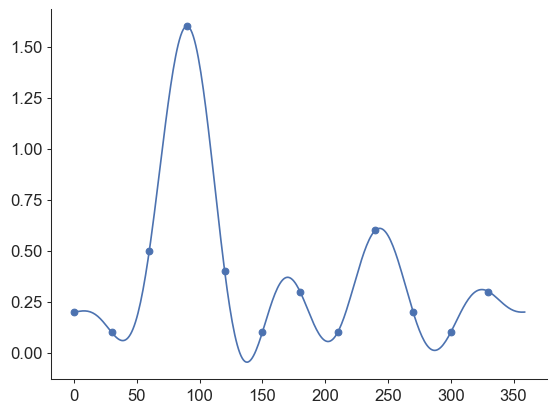

In [114]:
n = 360
x = np.arange(0, n, 30)
y = np.array([0.2, 0.1, 0.5, 1.6, 0.4, 0.1, 0.3, 0.1, 0.6, 0.2, 0.1, 0.3])
Y = [0.200000, 0.200724, 0.201531, 0.202365, 0.203171, 0.203893, 0.204472, 0.204855, 0.204985, 0.204812, 0.204285, 0.203362, 0.202001, 0.200168, 0.197834, 0.194978, 0.191584, 0.187647, 0.183168, 0.178156, 0.172633, 0.166625, 0.160170, 0.153316, 0.146119, 0.138645, 0.130967, 0.123168, 0.115341, 0.107583, 0.100000, 0.092704, 0.085812, 0.079447, 0.073734, 0.068802, 0.064781, 0.061802, 0.059995, 0.059489, 0.060410, 0.062879, 0.067013, 0.072922, 0.080709, 0.090468, 0.102282, 0.116225, 0.132358, 0.150731, 0.171380, 0.194324, 0.219571, 0.247111, 0.276921, 0.308958, 0.343167, 0.379473, 0.417787, 0.458003, 0.500000, 0.543640, 0.588773, 0.635231, 0.682837, 0.731398, 0.780713, 0.830568, 0.880742, 0.931005, 0.981121, 1.030850, 1.079948, 1.128171, 1.175271, 1.221006, 1.265134, 1.307419, 1.347631, 1.385549, 1.420959, 1.453662, 1.483466, 1.510199, 1.533698, 1.553820, 1.570439, 1.583446, 1.592752, 1.598286, 1.600000, 1.597865, 1.591874, 1.582041, 1.568401, 1.551010, 1.529946, 1.505305, 1.477205, 1.445782, 1.411192, 1.373606, 1.333212, 1.290213, 1.244826, 1.197281, 1.147817, 1.096683, 1.044137, 0.990441, 0.935863, 0.880672, 0.825140, 0.769535, 0.714126, 0.659175, 0.604940, 0.551669, 0.499604, 0.448975, 0.400000, 0.352884, 0.307818, 0.264977, 0.224520, 0.186589, 0.151307, 0.118781, 0.089096, 0.062319, 0.038499, 0.017663, -0.000179, -0.015039, -0.026944, -0.035941, -0.042097, -0.045492, -0.046224, -0.044406, -0.040165, -0.033641, -0.024985, -0.014359, -0.001935, 0.012110, 0.027588, 0.044311, 0.062085, 0.080713, 0.100000, 0.119750, 0.139769, 0.159868, 0.179861, 0.199571, 0.218825, 0.237460, 0.255322, 0.272269, 0.288167, 0.302897, 0.316351, 0.328434, 0.339067, 0.348182, 0.355726, 0.361661, 0.365964, 0.368625, 0.369648, 0.369052, 0.366868, 0.363141, 0.357927, 0.351296, 0.343326, 0.334109, 0.323742, 0.312334, 0.300000, 0.286861, 0.273045, 0.258683, 0.243910, 0.228863, 0.213682, 0.198505, 0.183469, 0.168711, 0.154364, 0.140558, 0.127417, 0.115060, 0.103600, 0.093142, 0.083784, 0.075615, 0.068714, 0.063153, 0.058991, 0.056279, 0.055055, 0.055349, 0.057178, 0.060548, 0.065456, 0.071887, 0.079813, 0.089200, 0.100000, 0.112158, 0.125608, 0.140277, 0.156081, 0.172930, 0.190728, 0.209371, 0.228750, 0.248750, 0.269254, 0.290140, 0.311284, 0.332560, 0.353842, 0.375003, 0.395915, 0.416456, 0.436502, 0.455933, 0.474634, 0.492494, 0.509407, 0.525271, 0.539994, 0.553487, 0.565670, 0.576473, 0.585831, 0.593688, 0.600000, 0.604728, 0.607846, 0.609335, 0.609186, 0.607400, 0.603989, 0.598971, 0.592377, 0.584244, 0.574619, 0.563559, 0.551126, 0.537393, 0.522437, 0.506345, 0.489206, 0.471120, 0.452187, 0.432515, 0.412213, 0.391394, 0.370174, 0.348670, 0.326999, 0.305280, 0.283629, 0.262164, 0.240997, 0.220240, 0.200000, 0.180382, 0.161483, 0.143399, 0.126215, 0.110015, 0.094873, 0.080854, 0.068020, 0.056422, 0.046103, 0.037097, 0.029431, 0.023122, 0.018178, 0.014599, 0.012377, 0.011493, 0.011920, 0.013626, 0.016568, 0.020697, 0.025956, 0.032281, 0.039604, 0.047850, 0.056939, 0.066788, 0.077309, 0.088410, 0.100000, 0.111984, 0.124266, 0.136751, 0.149345, 0.161953, 0.174484, 0.186849, 0.198962, 0.210742, 0.222111, 0.232997, 0.243334, 0.253060, 0.262122, 0.270471, 0.278068, 0.284879, 0.290877, 0.296044, 0.300370, 0.303850, 0.306489, 0.308297, 0.309293, 0.309501, 0.308951, 0.307682, 0.305735, 0.303157, 0.300000, 0.296320, 0.292175, 0.287627, 0.282739, 0.277575, 0.272200, 0.266680, 0.261077, 0.255455, 0.249874, 0.244392, 0.239062, 0.233935, 0.229057, 0.224468, 0.220205, 0.216296, 0.212766, 0.209632, 0.206906, 0.204593, 0.202690, 0.201189, 0.200076, 0.199330, 0.198926, 0.198829, 0.199005, 0.199411]
plt.scatter(x, y)
plt.plot(Y)

# n_pad_left = (n-len(x)) // 2
# y_pad = np.zeros(n)
# y_pad[n_pad_left:n_pad_left+len(x)] = x
# y_interpft = np.real(np.fft.ifft(np.fft.fftshift(y_pad)))
# plt.plot(y_interpft)

# Plot each response in a heatmap

In [20]:
dgf[1].sf_list

array([0.04, 0.08])

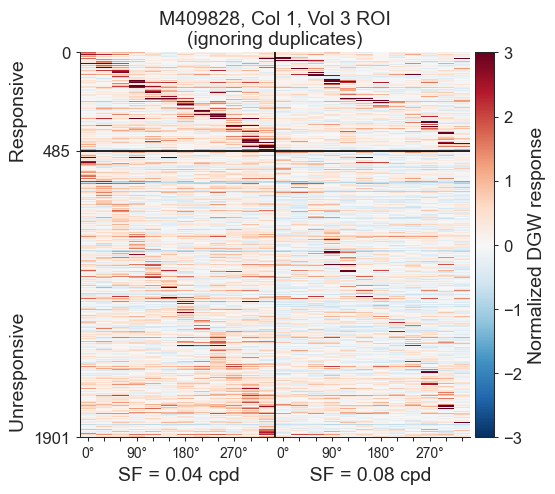

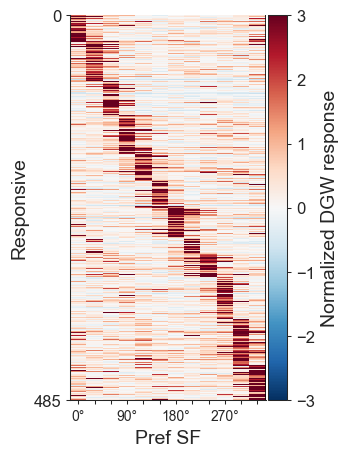

In [52]:
dg_type = "w"
n_dir, n_sf = 12, 2
# df = coreg_metrics.sort_values("dgw_frac_responsive_trials", ascending=True)
df = metrics[(metrics.dgw_frac_responsive_trials >= 0) & ~metrics.is_ignored_duplicate & (metrics.volume == 3) & (metrics.column == 1)]
# df = metrics[(metrics.dgw_frac_responsive_trials >= 0) & (metrics.volume == 3) & (metrics.column == 1)]
# df = coreg_metrics

coreg_roi_resp = np.zeros((len(df), n_dir*n_sf), dtype=float)
coreg_roi_resp_pref_sf = np.zeros((len(df), n_dir), dtype=float)
pref_dir = np.zeros(len(df))

for i, (_, row) in enumerate(df.iterrows()):
    roi, plane = row["roi"], row["plane"]
    dg = (dgw if dg_type == "w" else dgf)[plane]
    pref_sf_idx = int(row[f"dg{dg_type}_pref_sf_idx"])
    pref_dir_idx = int(row[f"dg{dg_type}_pref_dir_idx"])
    is_responsive = row[f"dg{dg_type}_frac_responsive_trials"] >= 0.5
    # is_responsive = row[f"dg{dg_type}_chisq_response_p"] <= 0.01
    mean_trial_response = np.nanmean(dg.trial_responses[roi], axis=2) # shape (n_dir, n_sf)
    mean_grating_response = np.mean(mean_trial_response) # ROI's mean response to any grating
    mean_blank_response = np.mean(dg.blank_responses[roi]) # ROI's mean response to the blank sweep

    mean_resp = mean_trial_response.T.flatten() # shape (n_dir*n_sf,); transpose to keep directions together (i.e., SF 0 then SF 1)
    norm_resp = (mean_resp - mean_blank_response) / (mean_grating_response + mean_blank_response)
    coreg_roi_resp[i, :] = norm_resp
    coreg_roi_resp_pref_sf[i, :] = norm_resp[pref_sf_idx*n_dir:(pref_sf_idx+1)*n_dir]
    pref_dir[i] = pref_dir_idx + (0 if is_responsive else n_dir)

sort_idx = np.argsort(pref_dir) # Ascending
# sort_idx = np.arange(len(df))

n_responsive_rois = np.count_nonzero(pref_dir < n_dir)

fig, ax = plt.subplots(figsize=(6, 5))
c = ax.pcolormesh(coreg_roi_resp[sort_idx], cmap="RdBu_r", vmin=-3, vmax=3)
cbar = fig.colorbar(c, ax=ax, pad=.01)
cbar.set_label(f"Normalized DG{dg_type.upper()} response")
ax.invert_yaxis()
ax.axhline(y=n_responsive_rois, color="black") # Add horizontal lines where ROIs are no longer considered "responsive"
ax.set_yticks([0, n_responsive_rois, len(df)])
for i in range(1, n_sf):
    ax.axvline(x=i*n_dir, color="black")
ax.set_title("M409828, Col 1, Vol 3 ROI\n(ignoring duplicates)")
ax.set_xlabel("SF = 0.04 cpd             SF = 0.08 cpd")
ax.set_ylabel("Unresponsive                            Responsive")
dir_labels = [f"{d*30}°" if d % 3 == 0 else "" for d in range(n_dir)]
ax.set_xticks(0.5+np.arange(n_dir*n_sf), labels=dir_labels*n_sf, fontsize=10)

fig, ax = plt.subplots(figsize=(3, 5))
c = ax.pcolormesh(coreg_roi_resp_pref_sf[sort_idx][:n_responsive_rois], cmap="RdBu_r", vmin=-3, vmax=3)
cbar = fig.colorbar(c, ax=ax, pad=.01)
ax.invert_yaxis()
ax.set_yticks([0, n_responsive_rois])
cbar.set_label(f"Normalized DG{dg_type.upper()} response")
for i in range(1, n_sf):
    ax.axvline(x=i*n_dir, color="black")
ax.set_xlabel("Pref SF")
ax.set_ylabel("Responsive")
ax.set_xticks(0.5+np.arange(n_dir), labels=dir_labels, fontsize=10)

# Examine tuning properties 

In [15]:
cell_type_table = em_client.get_cell_type_table()
cell_type_table.head()

,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,axon_proofreading_complete,dendrite_proofreading_status,dendrite_proofreading_complete
0,0,1132,t,350562,coarse_manual,PYC,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",not_started,False,not_started,False
1,1,214,t,383955,coarse_manual,PYC,383955,t,504.192300,95649060060623076,864691132569667100,"[920802, 795478, 329220]","[914826, 790822, 34920]","[926389, 800366, 36123]","[14.741818935006158, 576.1578669978572, -307.2...",in_progress,False,in_progress,False
2,2,13,t,385028,coarse_manual,PYC,385028,t,415.785065,95863052645657911,864691132781402571,"[929338, 898530, 386595]","[924914, 892245, 41162]","[933994, 903885, 42103]","[23.848399659480666, 690.7637364002102, -279.5...",in_progress,False,in_progress,False
3,3,717,t,293764,coarse_manual,PYC,293764,t,231.369357,94450111081742956,864691132625300120,"[878665, 697702, 245475]","[874009, 694365, 26030]","[883554, 701349, 26859]","[-27.97517873296875, 459.74380331495826, -361....",submitted,True,submitted,True
4,4,2604,t,351373,coarse_manual,PYC,351373,t,277.321739,96276193669654108,864691132689074198,"[944314, 572378, 210330]","[939814, 568187, 22179]","[948505, 576413, 23110]","[37.02512562261708, 329.260361441734, -362.108...",not_started,False,not_started,False


In [16]:
all_root_ids = cell_type_table[(cell_type_table.cell_type == "MC") & cell_type_table.dendrite_proofreading_complete & cell_type_table.axon_proofreading_complete].pt_root_id.values
len(all_root_ids)

25

In [17]:
all_root_ids = cell_type_table[(cell_type_table.cell_type == "BC") & cell_type_table.axon_proofreading_complete].pt_root_id.values
len(all_root_ids)

45

In [244]:
dgw_responsive_rois = metrics.index[metrics.dgw_frac_responsive_trials >= 0.5].values
# all_root_ids = coreg_table[coreg_table.roi.isin(dgw_responsive_rois) & coreg_table.dendrite_proofreading_complete].pt_root_id.values
all_root_ids = coreg_table[coreg_table.roi.isin(dgw_responsive_rois) & coreg_table.axon_proofreading_complete].pt_root_id.values
len(all_root_ids)

(8,
 array([864691132835126165, 864691132656860120, 864691132924264745,
        864691132829082994, 864691132834513288, 864691132834400136,
        864691132734110231, 864691132729544320]))

In [243]:
all_root_ids

array([864691132835126165, 864691132656860120, 864691132924264745,
       864691132829082994, 864691132834513288, 864691132834400136,
       864691132734110231, 864691132729544320])

In [245]:
all_syn.pre_pt_root_id.unique()

array([864691132656860120, 864691132729544320, 864691132734110231,
       864691132829082994, 864691132834400136, 864691132834513288,
       864691132835126165, 864691132924264745])

In [234]:
# Get the incoming synaptic connections of these MCs
# all_syn = em_client.get_dendritic_synapses(all_root_ids)
all_syn = em_client.get_axonal_synapses(all_root_ids)
all_syn

,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,synapse_position_microns,pre_soma_position_voxels,pre_soma_position_microns,post_soma_position_voxels,post_soma_position_microns
0,0,474909406,t,96066187083392129,864691132656860120,96066187083383086,864691132850134522,420,"[96686, 62895, 6058]","[96693, 62914, 6045]","[96683, 62919, 6050]","[30.82921680232859, 382.2909959191311, -312.19...","[839865, 615135, 314550]","[-67.0786494707422, 398.87445716488315, -273.1...",None,None
1,1,493301800,t,96424902953263600,864691132656860120,96424902953266978,864691129148421992,2323,"[97839, 88536, 7621]","[97899, 88591, 7624]","[97874, 88565, 7623]","[43.29974519388739, 640.700867454387, -311.004...","[839865, 615135, 314550]","[-67.0786494707422, 398.87445716488315, -273.1...",None,None
2,2,392109503,t,92682853238220359,864691132656860120,92682853238220245,864691129628168560,266,"[84350, 42083, 12720]","[84349, 42041, 12723]","[84349, 42051, 12722]","[-89.39724169051216, 268.62911589663116, 30.69...","[839865, 615135, 314550]","[-67.0786494707422, 398.87445716488315, -273.1...",None,None
3,3,333979959,t,90436069409125608,864691132656860120,90436069409128477,864691132738167129,357,"[76196, 60622, 8358]","[76174, 60578, 8359]","[76183, 60593, 8358]","[-167.88915424449755, 389.7424621442014, -206....","[839865, 615135, 314550]","[-67.0786494707422, 398.87445716488315, -273.1...","[720361, 497028, 407070]","[-187.02433058931598, 310.4401233939356, -152...."
4,4,426872341,t,93957460683034729,864691132656860120,93957460683034594,864691132801366679,1107,"[88983, 71680, 1659]","[88949, 71637, 1657]","[88962, 71671, 1660]","[-43.74403571438545, 411.77706654630197, -525....","[839865, 615135, 314550]","[-67.0786494707422, 398.87445716488315, -273.1...","[919250, 715860, 72045]","[12.46531621314888, 430.61237507529347, -533.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,6357,468263683,t,95363943153275237,864691132924264745,95363943153270560,864691132692379890,735,"[94054, 68416, 9145]","[94043, 68405, 9140]","[94052, 68408, 9142]","[5.74107450630865, 471.20213059515925, -192.68...","[837770, 609238, 208845]","[-69.34275280426944, 364.9075683333867, -373.4...",None,None
6140,6358,437021896,t,94026730318124088,864691132924264745,94026661598655821,864691132681365295,1492,"[89176, 67474, 4639]","[89214, 67424, 4644]","[89205, 67460, 4636]","[-41.88894442180055, 408.3554339840604, -385.6...","[837770, 609238, 208845]","[-69.34275280426944, 364.9075683333867, -373.4...","[833036, 654789, 221175]","[-73.84180264139292, 412.11978680161064, -373...."
6141,6359,326572119,t,89735268521022580,864691132924264745,89664899776840258,864691132729736243,1036,"[73449, 71529, 11032]","[73383, 71513, 11042]","[73419, 71525, 11036]","[-193.86698354955345, 524.021192471864, -118.9...","[837770, 609238, 208845]","[-69.34275280426944, 364.9075683333867, -373.4...","[672482, 672947, 495135]","[-233.94168817249638, 503.7489446827086, -114...."
6142,6360,456575790,t,95643631288907367,864691132924264745,95643631288908646,864691131974944422,2459,"[94970, 61817, 7706]","[94960, 61798, 7708]","[94957, 61818, 7706]","[14.232888192054583, 392.15046665757916, -237....","[837770, 609238, 208845]","[-69.34275280426944, 364.9075683333867, -373.4...",None,None


In [151]:
root_id_to_roi = pd.Series(index=coreg_table.pt_root_id.values, data=coreg_table.roi.values)
len(root_id_to_roi)

48

In [235]:
coreg_table_russell = pd.read_csv("../../dataframes/20230121_correspondence_table.tsv", sep="\t")
coreg_table_russell["ophys_plane"] = coreg_table_russell["ophys_plane_name"].apply(lambda plane_name: int(plane_name[5:]) + 1) # "plane0" --> 1
coreg_table_russell["ophys_roi"] = coreg_table_russell["ophys_roi_name"].apply(lambda roi_name: int(roi_name[roi_name.index("_")+1:])) # "roi_0001" --> 1
coreg_table_russell["roi"] = coreg_table_russell.apply(lambda row: f"M409828_{row.ophys_column}{row.ophys_volume}_{row.ophys_plane}_{row.ophys_roi}", axis=1) # e.g., M409828_11_1_89

In [158]:
# Add pt_root_ids to coreg_table_russell
nucleus_table = em_client.query_table(em_client.nucleus_table)
nucleus_table["pt_position_enc"] = nucleus_table["pt_position"].apply(lambda pos: f"[{pos[0]}, {pos[1]}, {pos[2]}]")
position_to_root_id = pd.Series(index=nucleus_table.pt_position_enc.values, data=nucleus_table.pt_root_id.values)
coreg_table_russell["pt_root_id"] = coreg_table_russell["nucleus_point_nm"].apply(lambda pos: position_to_root_id.get(pos, None))

201 - "Limited query to 200000 rows


In [187]:
root_id_to_roi_all_with_dups = pd.Series(index=coreg_table_russell.pt_root_id.values, data=coreg_table_russell.roi.values)
coreg_table_russell_no_dups = coreg_table_russell.drop_duplicates("pt_root_id")
root_id_to_roi_all = pd.Series(index=coreg_table_russell_no_dups.pt_root_id.values, data=coreg_table_russell_no_dups.roi.values)
len(root_id_to_roi_all)

3451

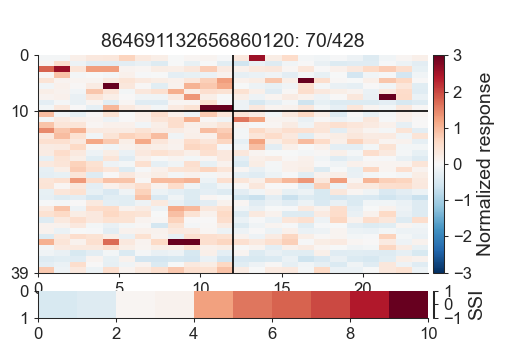

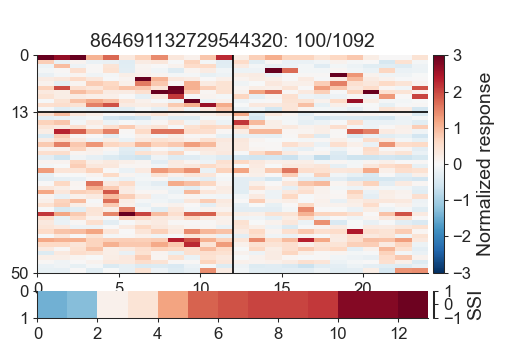

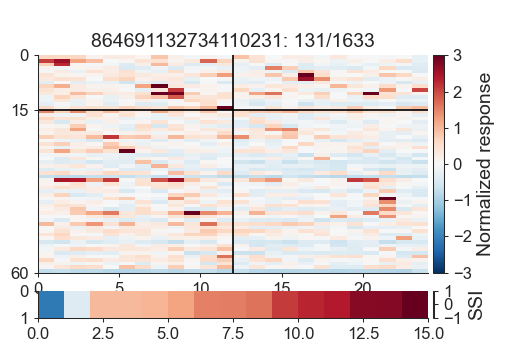

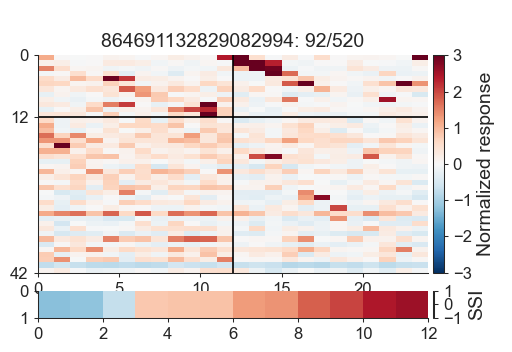

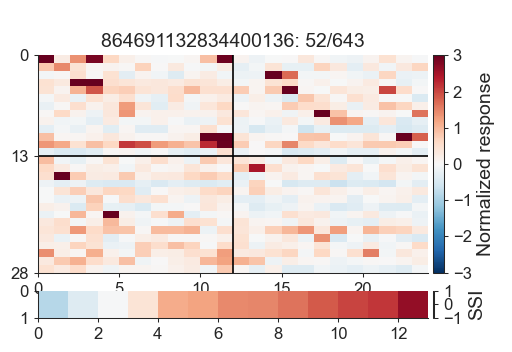

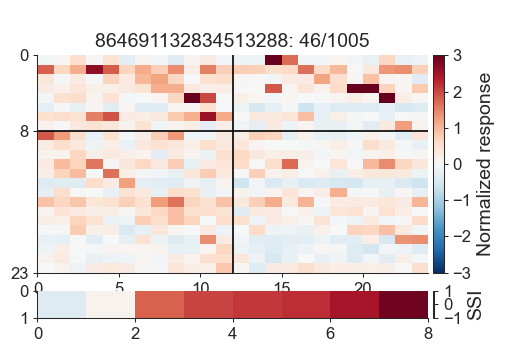

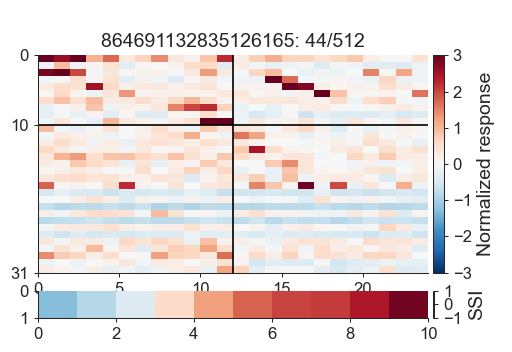

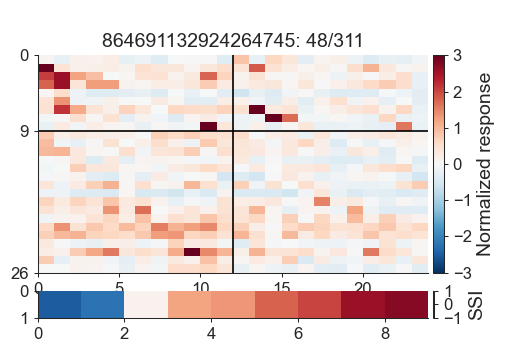

In [240]:
# For each MC, generate a waterfall plot of the DG response curves
# root_id = proof_mc_root_ids[1]
# for root_id in all_syn.post_pt_root_id.unique():
key, alt_key = "pre_pt_root_id", "post_pt_root_id" # For AXONAL synapses
# key, alt_key = "post_pt_root_id", "pre_pt_root_id" # For DENDRITIC synapses
# key = "post_pt_root_id"

for root_id in all_syn[key].unique():
    syn = all_syn[all_syn[key] == root_id]
    alt_root_ids = syn[alt_key].values
    # alt_rois = [root_id_to_roi[r] for r in alt_root_ids if r in root_id_to_roi]
    alt_rois = [root_id_to_roi_all[r] for r in alt_root_ids if r in root_id_to_roi_all]

    # pre_rois = []
    # for r in alt_root_ids:
    #     if r in root_id_to_roi_all:
    #         v = root_id_to_roi_all_with_dups[r]
    #         if type(v) is str:
    #             pre_rois.append(v)
    #         else:
    #             for vv in v.values:
    #                 pre_rois.append(vv)

    dg_type = "w"
    n_dir, n_sf = 12, 2
    df = metrics[metrics.index.isin(alt_rois)]

    coreg_roi_resp = np.zeros((len(df), n_dir*n_sf), dtype=float)
    coreg_roi_resp_pref_sf = np.zeros((len(df), n_dir), dtype=float)
    pref_dir = np.zeros(len(df), dtype=int)

    for i, (_, row) in enumerate(df.iterrows()):
        roi, plane = row["roi"], row["plane"]
        dg = (dgw if dg_type == "w" else dgf)[plane]
        pref_sf_idx = int(row[f"dg{dg_type}_pref_sf_idx"])
        pref_dir_idx = int(row[f"dg{dg_type}_pref_dir_idx"])
        is_responsive = row[f"dg{dg_type}_frac_responsive_trials"] >= 0.5
        # is_responsive = row[f"dg{dg_type}_chisq_response_p"] <= 0.01
        mean_trial_response = np.nanmean(dg.trial_responses[roi], axis=2) # shape (n_dir, n_sf)
        mean_grating_response = np.mean(mean_trial_response) # ROI's mean response to any grating
        mean_blank_response = np.mean(dg.blank_responses[roi]) # ROI's mean response to the blank sweep

        mean_resp = mean_trial_response.T.flatten() # shape (n_dir*n_sf,); transpose to keep directions together (i.e., SF 0 then SF 1)
        norm_resp = (mean_resp - mean_blank_response) / (mean_grating_response + mean_blank_response)
        coreg_roi_resp[i, :] = norm_resp
        coreg_roi_resp_pref_sf[i, :] = norm_resp[pref_sf_idx*n_dir:(pref_sf_idx+1)*n_dir]
        pref_dir[i] = pref_dir_idx + (0 if is_responsive else n_dir)

    sort_idx = np.argsort(pref_dir) # Ascending
    # sort_idx = np.arange(len(df))

    is_responsive_mask = pref_dir < n_dir
    n_responsive_rois = np.count_nonzero(is_responsive_mask)

    fig, axs = plt.subplots(figsize=(6, 4), nrows=3, gridspec_kw=dict(height_ratios=[1, 8, 1]))

    ax = axs[1]
    c = ax.pcolormesh(coreg_roi_resp[sort_idx], cmap="RdBu_r", vmin=-3, vmax=3)
    cbar = fig.colorbar(c, ax=ax, pad=.01)
    cbar.set_label("Normalized response")
    ax.invert_yaxis()
    ax.axhline(y=n_responsive_rois, color="black") # Add horizontal lines where ROIs are no longer considered "responsive"
    ax.set_yticks([0, n_responsive_rois, len(df)])
    for i in range(1, n_sf):
        ax.axvline(x=i*n_dir, color="black")
    ax.set_title(f"{root_id}: {len(alt_rois)}/{len(syn)}")

    ax = axs[2]
    ssi = df.ssi.values
    ssi_sorted = sorted(ssi[is_responsive_mask])# + sorted(ssi[~is_responsive_mask]) # [SSI for responsive ROIs] + [SSI for non-responsive ROIs]
    c = ax.pcolormesh([ssi_sorted], cmap="RdBu_r", vmin=-1, vmax=1)
    cbar = fig.colorbar(c, ax=ax, pad=.01)
    cbar.set_label("SSI")
    ax.invert_yaxis()

    ax = axs[0]
    ax.axis("off")
    # TODO: Plot this cell's tuning properties

    # fig, ax = plt.subplots(figsize=(3, 5))
    # c = ax.pcolormesh(coreg_roi_resp_pref_sf[sort_idx][:n_responsive_rois], cmap="RdBu_r", vmin=-3, vmax=3)
    # cbar = fig.colorbar(c, ax=ax, pad=.01)
    # ax.invert_yaxis()
    # ax.set_yticks([0, n_responsive_rois])
    # cbar.set_label("Normalized response")
    # for i in range(1, n_sf):
    #     ax.axvline(x=i*n_dir, color="black")

# Compare correlation of inputs received by cells

In [107]:
root_id_functional_data = {}

for _, row in coreg_table.iterrows():
    root_id = row["pt_root_id"]
    roi = row["roi"]
    met = metrics.loc[roi]

    # if not row["dendrite_proofreading_complete"]: continue
    if not row["axon_proofreading_complete"]: continue

    if met["dgw_frac_responsive_trials"] >= 0.25:
        root_id_functional_data[root_id] = {
            "roi": roi,
            "dgw_pref_dir": int(met["dgw_pref_dir"]),
            "ssi": met["ssi"],
        }

root_id_functional_data

{864691132741334425: {'roi': 'M409828_13_5_119',
  'dgw_pref_dir': 180,
  'ssi': 0.8222900629043579},
 864691132630689122: {'roi': 'M409828_13_2_75',
  'dgw_pref_dir': 90,
  'ssi': 0.6975409984588623},
 864691132835126165: {'roi': 'M409828_13_3_25',
  'dgw_pref_dir': 270,
  'ssi': 0.9758829474449158},
 864691132656860120: {'roi': 'M409828_13_5_109',
  'dgw_pref_dir': 180,
  'ssi': 0.7071619033813477},
 864691132924264745: {'roi': 'M409828_13_2_26',
  'dgw_pref_dir': 120,
  'ssi': 0.0219995528459548},
 864691132829082994: {'roi': 'M409828_13_3_29',
  'dgw_pref_dir': 300,
  'ssi': -0.8287356495857239},
 864691132712062021: {'roi': 'M409828_13_3_265',
  'dgw_pref_dir': 150,
  'ssi': 0.6121954321861267},
 864691132921491681: {'roi': 'M409828_13_3_414',
  'dgw_pref_dir': 90,
  'ssi': -0.1032098606228828},
 864691132834513288: {'roi': 'M409828_13_3_300',
  'dgw_pref_dir': 30,
  'ssi': -0.1535228639841079},
 864691132834400136: {'roi': 'M409828_13_5_17',
  'dgw_pref_dir': 0,
  'ssi': 0.816951

In [108]:
# Load the incoming synapses
root_ids = list(root_id_functional_data.keys())
# all_den_syn = em_client.get_dendritic_synapses(root_ids)
all_axo_syn = em_client.get_axonal_synapses(root_ids)

In [104]:
inh_root_ids = cell_type_table.pt_root_id.values[cell_type_table.cell_type.isin(["MC", "BC", "BPC", "NGC"])]
len(inh_root_ids)

289

Text(0, 0.5, 'Jaccard similarity of presynaptic inputs')

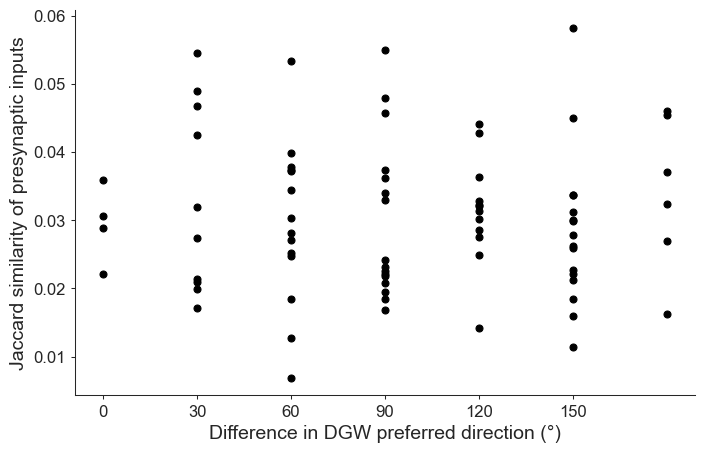

In [112]:
fig, ax = plt.subplots(figsize=(8, 5))


# For dendritic synapses
# presyn_in_volume = ~all_den_syn.pre_soma_position_voxels.isna()
# presyn_in_layer_4 = all_den_syn.pre_soma_position_microns.apply(lambda pos: pos is not None and em_client.layer_boundaries["4"][0] <= pos[1] <= em_client.layer_boundaries["4"][1])
# presyn_is_local = all_den_syn.apply(lambda row: row["pre_soma_position_microns"] is not None and np.linalg.norm(row["pre_soma_position_microns"] - row["post_soma_position_microns"]) <= 200, axis=1)
# presyn_is_inhibitory = all_den_syn.pre_pt_root_id.isin(inh_root_ids)

# For axonal synapses
postsyn_in_volume = ~all_axo_syn.post_soma_position_voxels.isna()
postsyn_in_layer_4 = all_axo_syn.post_soma_position_microns.apply(lambda pos: pos is not None and em_client.layer_boundaries["4"][0] <= pos[1] <= em_client.layer_boundaries["4"][1])
postsyn_is_local = all_axo_syn.apply(lambda row: row["post_soma_position_microns"] is not None and np.linalg.norm(row["pre_soma_position_microns"] - row["post_soma_position_microns"]) <= 200, axis=1)
postsyn_is_inhibitory = all_axo_syn.post_pt_root_id.isin(inh_root_ids)

# condition = presyn_is_local
# condition = presyn_in_layer_4
# condition = presyn_is_inhibitory

condition = postsyn_in_volume

# syn_table, this_root_id = all_den_syn, "post_pt_root_id"
syn_table, this_root_id, other_root_id = all_axo_syn, "pre_pt_root_id", "post_pt_root_id"

for i, root_id_1 in enumerate(root_ids):
    syn_1 = syn_table[(syn_table[this_root_id] == root_id_1) & condition]
    other_root_ids_1 = set(syn_1[other_root_id].values)

    for j in range(i+1, len(root_ids)):
        if i == j: continue
        root_id_2 = root_ids[j]
        pref_dir_diff = abs(root_id_functional_data[root_id_2]["dgw_pref_dir"] - root_id_functional_data[root_id_1]["dgw_pref_dir"])
        pref_dir_diff = min(360 - pref_dir_diff, pref_dir_diff)
        ssi_diff = root_id_functional_data[root_id_2]["ssi"] - root_id_functional_data[root_id_1]["ssi"]
        syn_2 = syn_table[(syn_table[this_root_id] == root_id_2) & condition]
        other_root_ids_2 = set(syn_2[other_root_id].values)

        # Similarity (|A n B| / |A u B| = |A n B| / (|A| + |B| - |A n B|))
        intersection = len(other_root_ids_1.intersection(other_root_ids_2))
        union = len(other_root_ids_1) + len(other_root_ids_2) - intersection
        presyn_similarity = intersection / union

        ax.scatter(pref_dir_diff, presyn_similarity, color="black", s=25)
        # ax.scatter(ssi_diff, presyn_similarity, color="black", s=25)

ax.set_xticks(np.arange(0, 180, 30))
ax.set_xlabel("Difference in DGW preferred direction (°)")
ax.set_ylabel("Jaccard similarity of presynaptic inputs")

/var/folders/8l/944wpj6s7sq8gcv57wcd3q6h0000gn/T/ipykernel_28465/3721780564.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = metrics[~metrics.is_ignored_duplicate & (df.dgw_frac_responsive_trials >= 0)]


DGW PearsonRResult(statistic=0.11576997347515462, pvalue=5.356198495225682e-06)
DGF PearsonRResult(statistic=-0.5568490573475334, pvalue=6.919243166015677e-126)


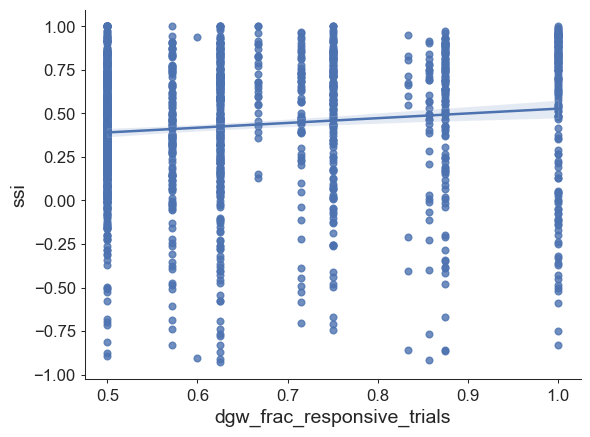

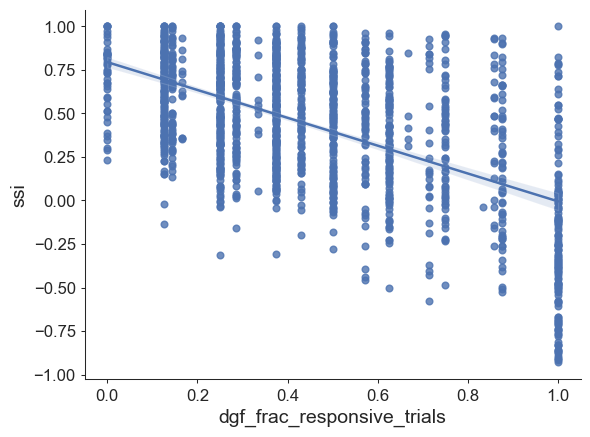

In [132]:
df = metrics[~metrics.is_ignored_duplicate & (df.dgw_frac_responsive_trials >= 0)]
sns.regplot(data=df, x="dgw_frac_responsive_trials", y="ssi")
print("DGW", st.pearsonr(df.dgw_frac_responsive_trials.values, df.ssi.values))

plt.figure()
sns.regplot(data=df, x="dgf_frac_responsive_trials", y="ssi")
# plt.figure()
# sns.boxplot(data=df, x="dgf_frac_responsive_trials", y="ssi")
print("DGF", st.pearsonr(df.dgf_frac_responsive_trials.values, df.ssi.values))

PearsonRResult(statistic=0.11576997347515462, pvalue=5.356198495225682e-06)